# Import Data and Library

---

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import warnings
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

# import
df = pd.read_csv('/content/drive/MyDrive/Machine learning folder/Credit Fraud/creditcard.csv')
df.head()

Mounted at /content/drive


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

___

In [ ]:
# Turn the time into the hour
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))

tmp = df.groupby(['Hour','Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['Hour', 'Class', 'Min', 'Max', 'Transaction', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()

,Hour,Class,Min,Max,Transaction,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [ ]:
# Create Function of Line Plotting
import matplotlib.ticker as mticker
def line_plotting(dataset = df_tmp, x_axis=None, y_axis=None, title = None):
  fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (13,5), sharey = False)

  sns.lineplot(data = dataset.loc[dataset.Class == 0][[x_axis, y_axis]], x = x_axis, y = y_axis, ax = axs[0])
  sns.lineplot(data = dataset.loc[dataset.Class == 1][[x_axis, y_axis]], x = x_axis, y = y_axis, ax = axs[1], color = 'red')

  for ax in axs:
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.yaxis.get_major_formatter().set_scientific (False)
    ax.yaxis.get_major_formatter().set_useOffset(False)

    ax.tick_params(axis = 'x', labelsize = 12)
    ax.tick_params(axis = 'y', labelsize = 12)

  plt.suptitle('The 48-hour Period of Transaction (in terms of {})'.format(title), fontsize = 14)
  fig.set_facecolor('#a0cdf8')
  axs[0].set_title('Normal Transaction', fontsize = 14)
  axs[1].set_title('Fraud Transaction', fontsize = 14)
  axs[0].set_xlabel('Hour', fontsize = 14)
  axs[1].set_xlabel('Hour', fontsize = 14)
  axs[0].set_ylabel(y_axis, fontsize = 14)
  axs[1].set_ylabel(y_axis, fontsize = 14)
  fig.tight_layout()

  #plt.savefig('Plot of {} Transaction.png'.format(y_axis), dpi = 300)
  #files.download('Plot of {} Transaction.png'.format(y_axis))
  return plt.show()

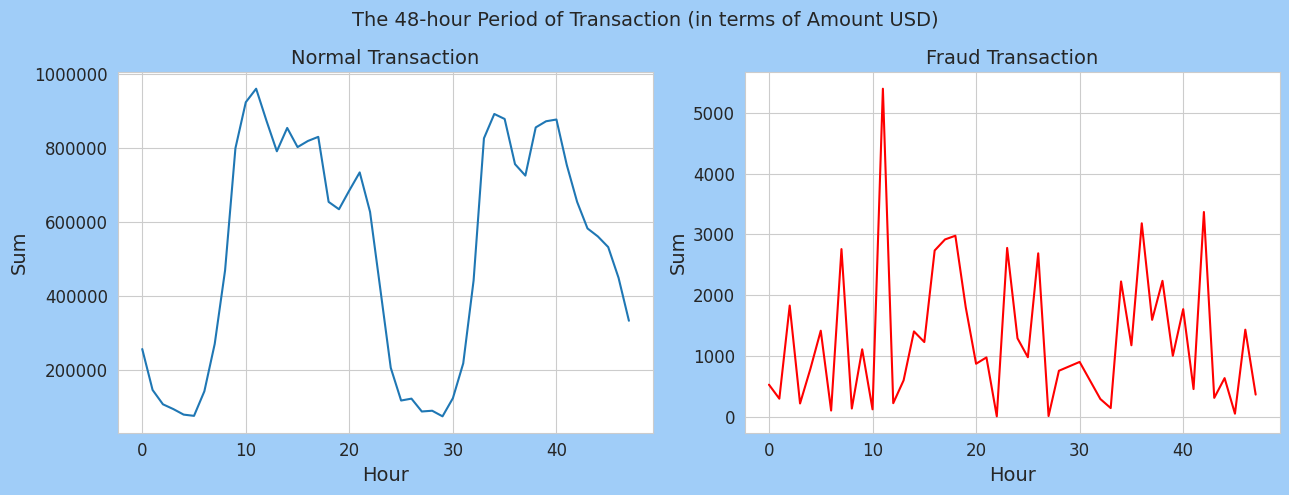

In [ ]:
# How much amount in 48-hour recorded transaction?
line_plotting(x_axis = 'Hour', y_axis = 'Sum', title = 'Amount USD')

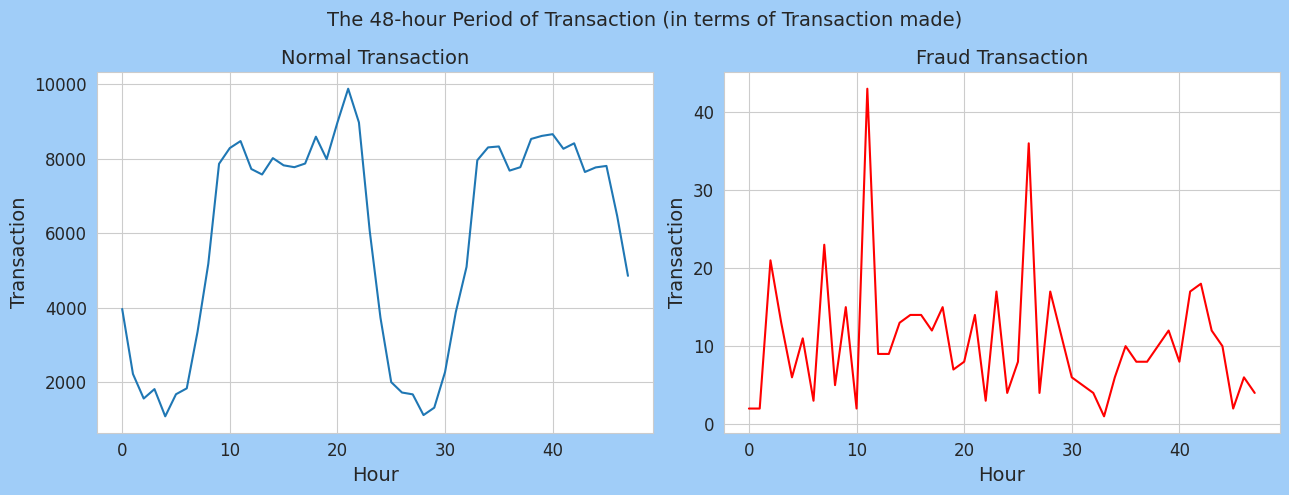

In [ ]:
# How Often transaction occured?

line_plotting(x_axis = 'Hour', y_axis = 'Transaction', title = 'Transaction made')

In [ ]:
# Sum all Fraud Transaction
df_tmp[df_tmp.Class == 1].Sum.sum()

np.float64(60127.970000000016)

In [ ]:
# How often credit card transaction in the daylight and night?
#Filter the DataFrame for hours between 9 and 22 (inclusive)
transactions_9_to_22 = df_tmp[(df_tmp['Hour'] >= 9) & (df_tmp['Hour'] <= 22)]

# Filter the DataFrame for hours between 22 to 34
transactions_22_to_34 = df_tmp[(df_tmp['Hour'] >= 22) & (df_tmp['Hour'] <= 34)]


# Sum the 'Transaction' column for both classes
total_transactions_9_to_22 = transactions_9_to_22['Transaction'].sum() # morning
total_transactions_22_to_34 = transactions_22_to_34['Transaction'].sum() # night

print(f"Total transactions in Daylight: {total_transactions_9_to_22}") # daylight
print(f"Total transactions in Night: {total_transactions_22_to_34}") # night

Total transactions in Daylight: 115986
Total transactions in Night: 54165


In [ ]:
# sum the 'Amount' column for both classes
total_amount_9_to_22 = transactions_9_to_22['Sum'].sum() # daylight
total_amount_22_to_34 = transactions_22_to_34['Sum'].sum() # night

print(f"Total amount in Daylight: {total_amount_9_to_22}") # daylight
print(f"Total amount in Night: {total_amount_22_to_34}") # night

Total amount in Daylight: 11024995.419999998
Total amount in Night: 4258374.77


In [ ]:
# total fraud transaction
# Filter the DataFrame for fraud transactions between 9th and 22nd hour (inclusive)
fraud_transactions_9_to_22 = df_tmp[(df_tmp['Class'] == 1) & (df_tmp['Hour'] >= 9) & (df_tmp['Hour'] <= 22)]
fraud_transaction_22_to_34 = df_tmp[(df_tmp['Class'] == 1) & (df_tmp['Hour'] >= 22) & (df_tmp['Hour'] <= 34)]
# Sum the 'Transaction' column for fraud transactions
total_fraud_transactions_9_to_22 = fraud_transactions_9_to_22['Transaction'].sum()
total_fraud_transaction_22_to_34 = fraud_transaction_22_to_34['Transaction'].sum()

print(f"Total fraud transactions between hour 9 and 22: {total_fraud_transactions_9_to_22}")
print(f"Total fraud transactions between hour 22 and 34: {total_fraud_transaction_22_to_34}")

Total fraud transactions between hour 9 and 22: 178
Total fraud transactions between hour 22 and 34: 106


In [ ]:
# percentage of fraud transaction
# at day
percentage_fraud_day = total_fraud_transactions_9_to_22*100/total_transactions_9_to_22
print('The probabilty of fraud at morning: ', percentage_fraud_day)

# at night
percentage_fraud_night = total_fraud_transaction_22_to_34*100/total_transactions_22_to_34
print('The probabilty of fraud at night: ', percentage_fraud_night)

The probabilty of fraud at morning:  0.15346679771696584
The probabilty of fraud at night:  0.19569832917935936


In [ ]:
# the amount of fraud transaction
#at day
amount_fraud_9_to_22 = fraud_transactions_9_to_22['Sum'].sum()
print('The amount of fraud transaction at morning (in $): ', amount_fraud_9_to_22)

#at night
amount_fraud_22_to_34 = fraud_transaction_22_to_34['Sum'].sum()
print('The amount of fraud transaction at night (in $): ', amount_fraud_22_to_34)

The amount of fraud transaction at morning (in $):  22378.44
The amount of fraud transaction at night (in $):  12084.440000000002


In [ ]:
# Finance loss ratio in fraud transaction
# at day
percentage_amount_fraud_day = amount_fraud_9_to_22*100/total_amount_9_to_22
print('The percentage of amount of fraud transaction at morning: ', percentage_amount_fraud_day)

# at night
percentage_amount_fraud_night = amount_fraud_22_to_34*100/total_amount_22_to_34
print('The percentage of amount of fraud transaction at night: ', percentage_amount_fraud_night)

The percentage of amount of fraud transaction at morning:  0.20297913194053738
The percentage of amount of fraud transaction at night:  0.28378056541979757


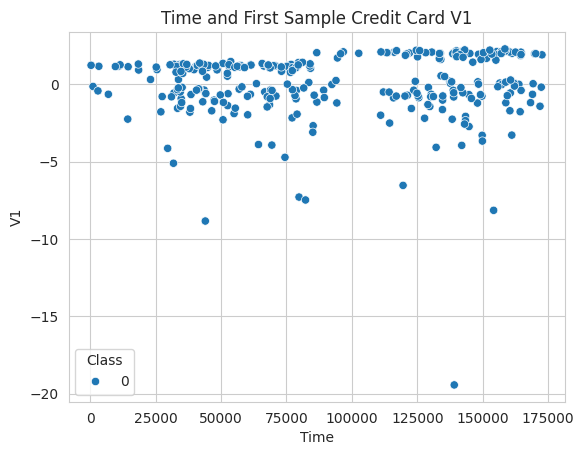

In [ ]:
# Plot Time and V1 hue Class
sns.scatterplot(data=df.sample(300, random_state = 100), x='Time', y='V1', hue='Class')
plt.title('Time and First Sample Credit Card V1')
plt.ylabel('V1')
plt.xlabel('Time')
#plt.savefig('Scatterplot of V1 sample')
#files.download('Scatterplot of V1 sample.png')
plt.show()

In [ ]:
# Percentage of credit card fraud victim
len(df[df.Class == 1])*100/len(df)

0.1727485630620034

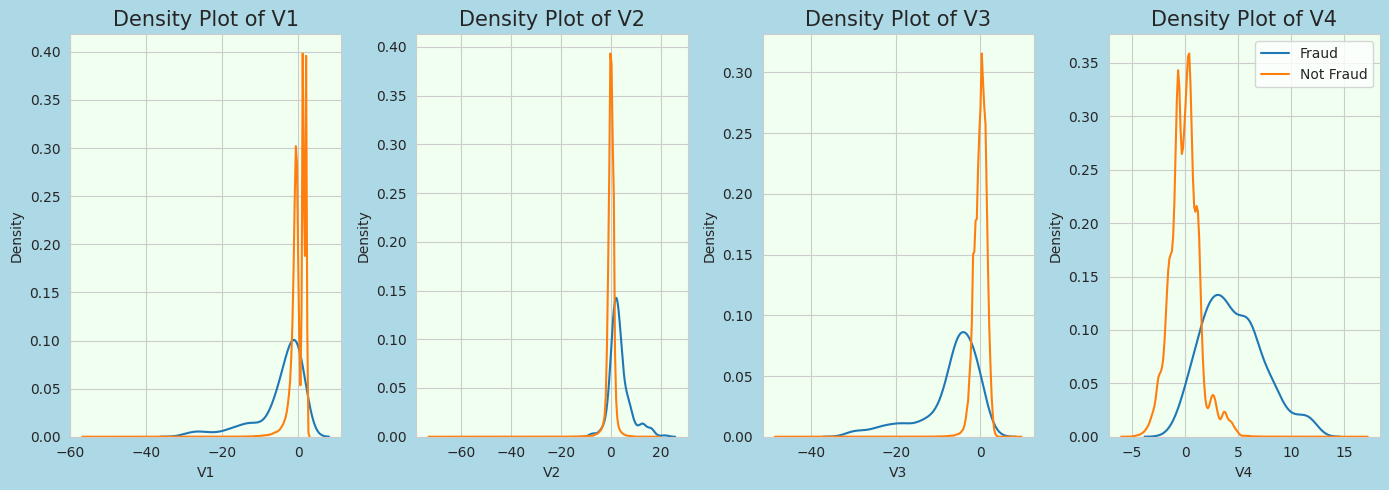

In [ ]:
# Density plot of V1 to V4
# Density plot of V1 - V4 with Separation of Class
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (14,5))

for i, ax in enumerate(axs):
  sns.kdeplot(data = df[df.Class == 1]['V{}'.format(i+1)], ax = ax, label = 'Fraud')
  sns.kdeplot(data = df[df.Class == 0]['V{}'.format(i+1)], ax = ax, label = 'Not Fraud')
  ax.set_title('Density Plot of V{}'.format(i+1), fontsize = 15)
  ax.set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.legend()
#plt.savefig("denseplot of v1 to v4.png", dpi = 300)
#files.download("denseplot of v1 to v4.png")
plt.show()

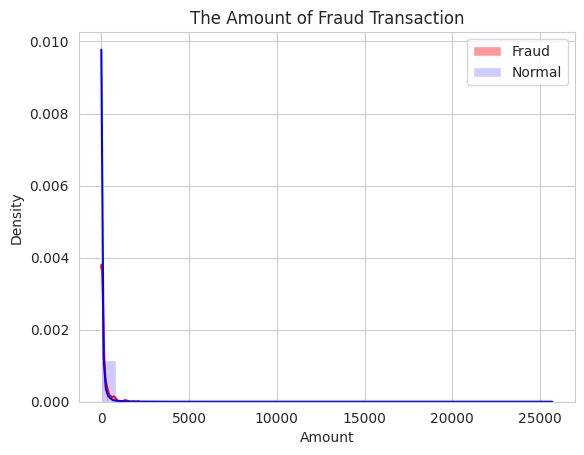

In [ ]:
# Fraud-Not Fraud transaction after
sns.set_style('whitegrid')
sns.histplot(data = df[df.Class == 1]['Amount'], bins = 30, kde = True, color = 'red', stat = 'density', alpha = 0.4, label = 'Fraud')
sns.histplot(data = df[df.Class == 0]['Amount'], bins = 30, kde = True, color = 'blue', stat = 'density', alpha = 0.2, label = 'Normal')
plt.title('The Amount of Fraud Transaction')
plt.legend()
#plt.savefig('The Amount of Fraud Transaction.png')
#files.download('The Amount of Fraud Transaction.png')
plt.show()

<Figure size 900x400 with 0 Axes>

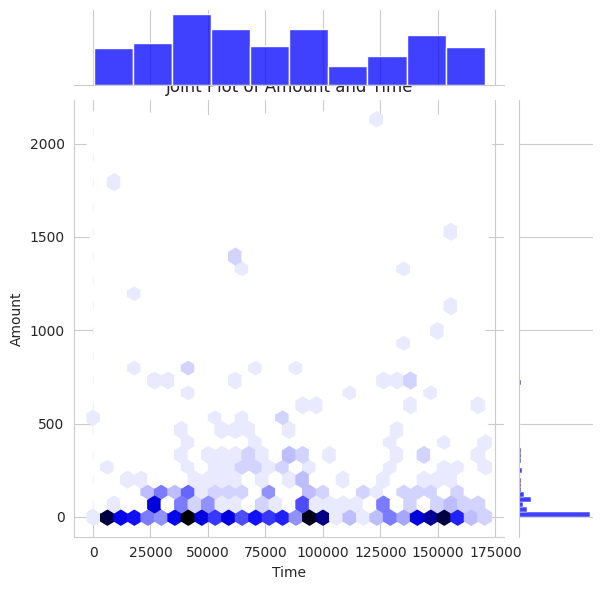

In [ ]:
# Jointplot of credit card nominal transaction vs time transaction occured
fig = plt.figure(figsize = (9, 4))
sns.jointplot(x = df[df.Class == 1]['Time'], y = df[df.Class == 1]['Amount'], kind = 'hex', color = 'blue')
plt.title('Joint Plot of Amount and Time')
fig.tight_layout()
plt.show()

# Feature Engineering

---

## Find data duplication

In [ ]:
# Find Duplicated Data
print('There are {} duplicated data of {} in total of Fraud transaction'.format(df[df.Class == 1].duplicated().sum(), df[df.Class == 1].shape[0]))
print('There are {} duplicated data of {} in total of Non-Fraud transaction'.format(df[df.Class == 0].duplicated().sum(), df[df.Class == 0].shape[0]))

There are 19 duplicated data of 492 in total of Fraud transaction
There are 1062 duplicated data of 284315 in total of Non-Fraud transaction


In [ ]:
# drop duplicated data
df_new = df.drop_duplicates()
print('Before drop data duplication: {}'.format(df.shape[0]))
print('After drop data duplication: {}'.format(df_new.shape[0]))

Before drop data duplication: 284807
After drop data duplication: 283726


## Find, Visualize, and Outlier Removal

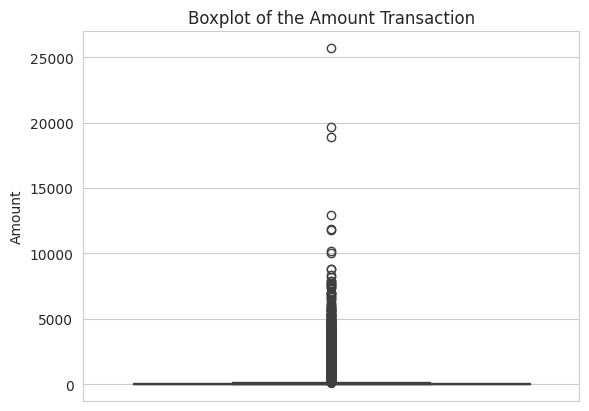

In [ ]:
# Create Boxplot to Find Outlier
sns.boxplot(data = df_new['Amount'])
plt.title('Boxplot of the Amount Transaction')
#plt.savefig('Boxplot of the Amount Transaction.png')
#files.download('Boxplot of the Amount Transaction.png')
plt.show()

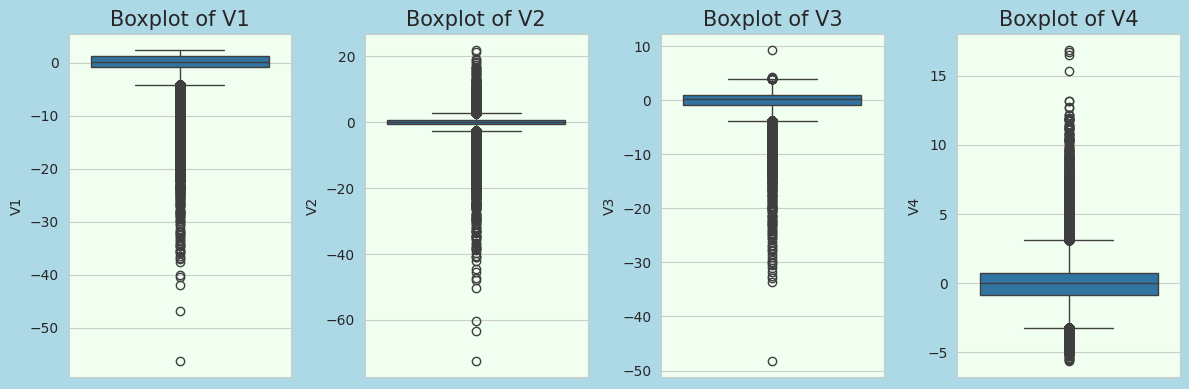

In [ ]:
# V1 - V4 outlier
fig, axs = plt.subplots(ncols = 4, nrows = 1, figsize = (12,4))

for i, ax in enumerate(axs):
  sns.boxplot(data = df_new['V{}'.format(i+1)], ax = ax)
  ax.set_title('Boxplot of V{}'.format(i+1), fontsize = 15)
  ax.set_facecolor('honeydew')

fig.tight_layout()
fig.set_facecolor('#ADD8E6')
#plt.savefig('Boxplot of V1 V4.png', dpi = 300)
#files.download('Boxplot of V1 V4.png')
plt.show()

In [ ]:
# Create a function of Interquantile method to detect outlier

def outlier_cols (data, feature):
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  iqr = q3 - q1

  lower_lim, upper_lim = q1 - 1.5*iqr, q3 + 1.5*iqr
  return lower_lim, upper_lim

for col in df_new.columns:
  print('Lower limit {}: upper limit {}'.format(col, outlier_cols(df_new, col)))


Lower limit Time: upper limit (np.float64(-73435.125), np.float64(266937.875))
Lower limit V1: upper limit (np.float64(-4.263979957375013), np.float64(4.66409638031512))
Lower limit V2: upper limit (np.float64(-2.7012257535647324), np.float64(2.901188080680856))
Lower limit V3: upper limit (np.float64(-3.7646449731967664), np.float64(3.901922942775768))
Lower limit V4: upper limit (np.float64(-3.2348066128229642), np.float64(3.1243191108670314))
Lower limit V5: upper limit (np.float64(-2.6429012689627394), np.float64(2.565289501788516))
Lower limit V6: upper limit (np.float64(-2.517765132942298), np.float64(2.1455265045234526))
Lower limit V7: upper limit (np.float64(-2.236984407382578), np.float64(2.2549488340082777))
Lower limit V8: upper limit (np.float64(-1.0106267049372626), np.float64(1.127501917245117))
Lower limit V9: upper limit (np.float64(-2.504517212462476), np.float64(2.4562733021698424))
Lower limit V10: upper limit (np.float64(-2.019373365934702), np.float64(1.9374139850

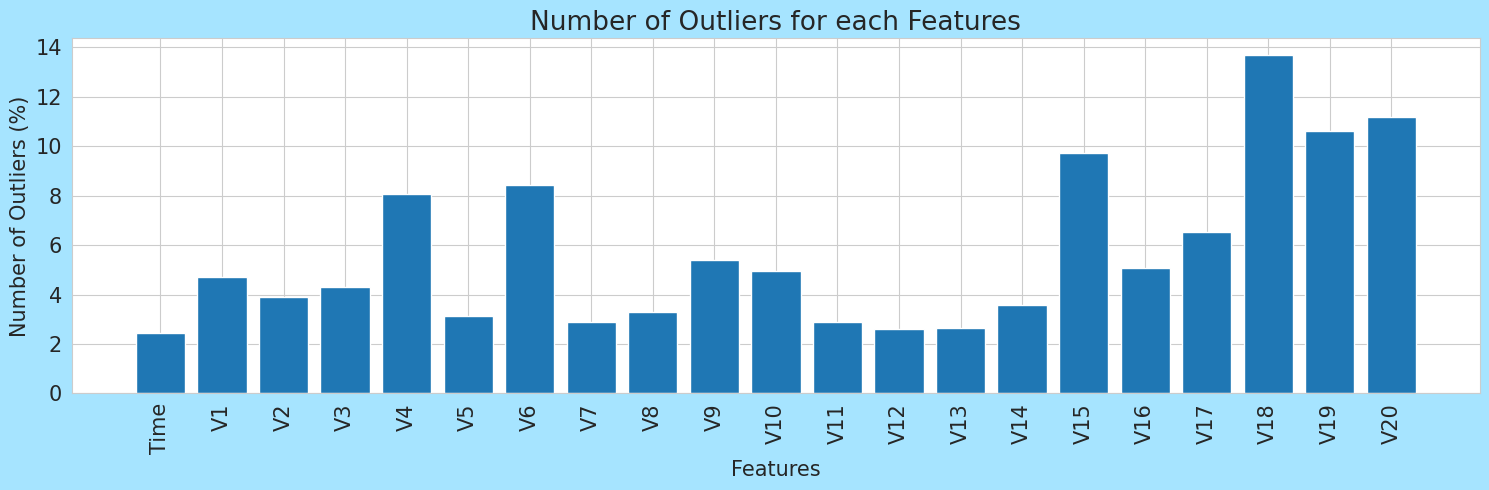

In [ ]:
# calculate the number of outliers for each features (IQR Method)
outliers_count = {}
total_data_points = len(df_new)

for col in df_new.columns:
  lower,upper = outlier_cols(df_new, col)
  outliers = df_new[(df_new[col]<lower) | (df_new[col]>upper)]
  outliers_count[col] = (len(outliers)/total_data_points)*100

fig, ax = plt.subplots(figsize = (15,5))

filter_feature = [feature for feature, percentage in outliers_count.items() if percentage>2]

ax.bar(filter_feature, [outliers_count[feature] for feature in filter_feature])
ax.set_title('Number of Outliers for each Features', fontsize = 19)
ax.set_xlabel('Features', fontsize = 15)
ax.set_ylabel('Number of Outliers (%)', fontsize = 15)
fig.set_facecolor('#a6e4ff')
ax.set_xticklabels(outliers_count.keys(), rotation = 90, fontsize = 15)
ax.tick_params(axis = 'y', labelsize=15)
fig.tight_layout()
#plt.savefig('Number of Outliers for each Features.png', dpi = 300)
#files.download('Number of Outliers for each Features.png')
plt.show()

### Handle Outlier by Imputation

In [ ]:
# Hanlde the outlier by imputation method
def outl_imputation(data, features):
  data_ = data.copy()

  for col in data_.columns:

    lower, upper = outlier_cols(data, col)
    data_.loc[data_[col] < lower, col] = lower
    data_.loc[data_[col] > upper, col] = upper

  return data_

df2 = df_new.drop(['Class'], axis = 1)

imputation_data = outl_imputation(df2, df2.columns)
imputation_data['Class'] = df_new['Class']
imputation_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Hour,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620,0.0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690,0.0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.611926,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,185.375,0.0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500,0.0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990,0.0,0


### Handle Outlier by Isolation Forest

In [ ]:
# import model and create new data
from sklearn.ensemble import IsolationForest
datacopy = df_new.copy()
datacopy.drop(['Class'], axis = 1, inplace = True)

# Implement isolation forest model
isolationforest = IsolationForest(n_estimators = 100, contamination = 0.1)
isolationforest.fit(datacopy)

# Anomaly Score
score = isolationforest.decision_function(datacopy)
len(score)

283726

In [ ]:
# Find Anomaly
anomaly = isolationforest.predict(datacopy)
anomaly

# input it to new dataset
datacopy['anomaly'] = anomaly
datacopy['score'] = score
datacopy.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hour,anomaly,score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,1,0.035037
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,1,0.054561
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,-1,-0.005261
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,1,0.019657
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,1,0.046970


In [ ]:
# locate indexes with anomaly score -1
anomalies = datacopy.loc[datacopy['anomaly'] == -1]
anomalies.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Hour,anomaly,score
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,-1,-0.005261
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0,-1,-0.026554
14,12.0,-2.791855,-0.327771,1.641750,1.767473,-0.136588,0.807596,-0.422911,-1.907107,0.755713,...,1.020586,0.028317,-0.232746,-0.235557,-0.164778,-0.030154,58.80,0.0,-1,-0.014767
18,14.0,-5.401258,-5.450148,1.186305,1.736239,3.049106,-1.763406,-1.559738,0.160842,1.233090,...,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80,0.0,-1,-0.056548
21,17.0,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,34.09,0.0,-1,-0.006448


In [ ]:
# drop anomalies and crete new dataset
anomalies_list = list(anomalies.index)
isoforest_data = df_new.copy()
isoforest_data.drop(anomalies_list, axis = 0, inplace = True)
isoforest_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,0.0


### Visualization of Raw, Imputation, and Isolation Forest Data

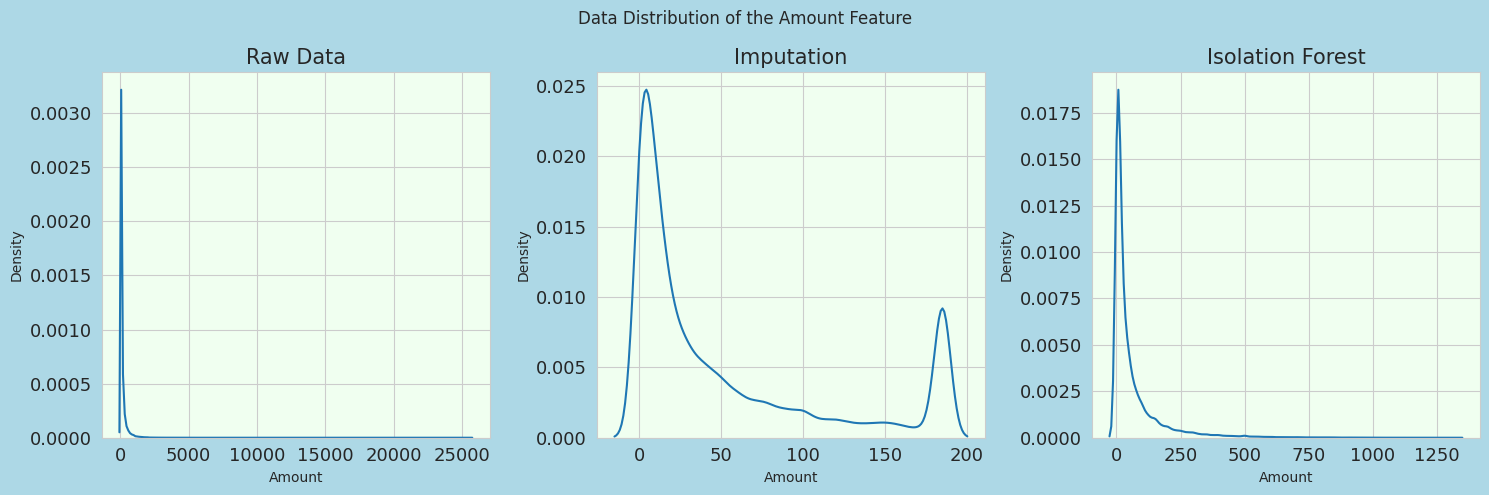

In [ ]:
# Amount Feature
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (15,5))
sns.kdeplot(data = df_new['Amount'], ax = axs[0], label = 'Raw Data')
sns.kdeplot(data = imputation_data['Amount'], ax = axs[1], label = 'Imputation')
sns.kdeplot(data = isoforest_data['Amount'], ax = axs[2], label = 'Isolation Forest')

for ax in axs:
  ax.set_facecolor('honeydew')
  ax.tick_params(axis = 'x', labelsize = 13)
  ax.tick_params(axis = 'y', labelsize = 13)

axs[0].set_title('Raw Data', fontsize = 15)
axs[1].set_title('Imputation', fontsize = 15)
axs[2].set_title('Isolation Forest', fontsize = 15)
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.suptitle ('Data Distribution of the Amount Feature')
fig.tight_layout()
#plt.savefig('Data Distribution of the Amount Feature.png', dpi = 300)
#files.download('Data Distribution the Amount Feature.png')
plt.show()

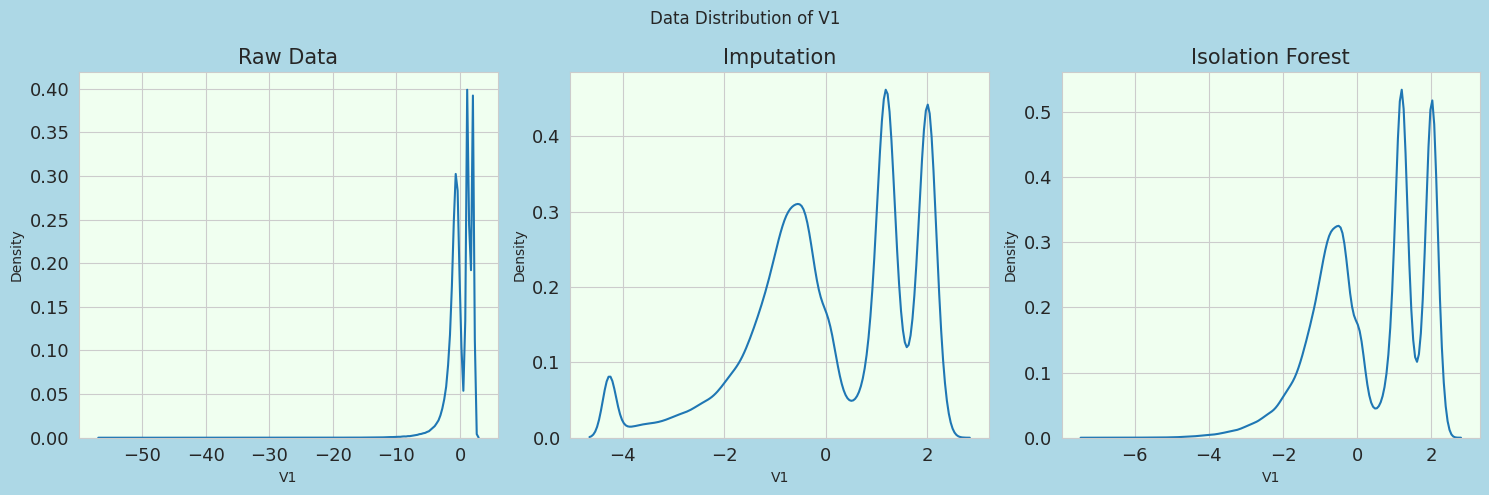

In [ ]:
# Amount Feature
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (15,5))
sns.kdeplot(data = df_new['V1'], ax = axs[0], label = 'Raw Data')
sns.kdeplot(data = imputation_data['V1'], ax = axs[1], label = 'Imputation')
sns.kdeplot(data = isoforest_data['V1'], ax = axs[2], label = 'Isolation Forest')

for ax in axs:
  ax.set_facecolor('honeydew')
  ax.tick_params(axis = 'x', labelsize = 13)
  ax.tick_params(axis = 'y', labelsize = 13)

axs[0].set_title('Raw Data', fontsize = 15)
axs[1].set_title('Imputation', fontsize = 15)
axs[2].set_title('Isolation Forest', fontsize = 15)
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
plt.suptitle ('Data Distribution of V1')
fig.tight_layout()
#plt.savefig('Data Distribution of V1 Feature.png', dpi = 300)
#files.download('Data Distribution of V1 Feature.png')
plt.show()

## Find Null Value

In [ ]:
# Handling null value
print('The dataset have {} null data of {} in total of Fraud Transaction'.format(df_new[df_new.Class == 1].isnull().sum().sum(), df_new[df_new.Class == 1].shape[0]))
print('The dataset have {} null data of {} in total of Non-Fraud Transaction'.format(df_new[df_new.Class == 0].isnull().sum().sum(), df_new[df_new.Class == 0].shape[0]))

The dataset have 0 null data of 473 in total of Fraud Transaction
The dataset have 0 null data of 283253 in total of Non-Fraud Transaction


## Skewness and its Visualization

In [ ]:
# skewness score
features = list(df_new.columns.values)
for column in features:
  print('{}: {}'.format(column, df_new[column].skew()))

Time: -0.03558064623598194
V1: -3.273271248440309
V2: -4.6951619005404694
V3: -2.1519839570997124
V4: 0.6715041706728241
V5: -2.414079246966253
V6: 1.829880383771521
V7: 2.890271192715498
V8: -8.310970330052545
V9: 0.5376630534496958
V10: 1.2529670787468168
V11: 0.34407419325686267
V12: -2.1990082816149954
V13: 0.06429340464018111
V14: -1.9188037137586451
V15: -0.3096590822936595
V16: -1.0511614715174662
V17: -3.690497194148406
V18: -0.24866145737243997
V19: 0.1083118109324772
V20: -2.0431210560273323
V21: 2.820033113572543
V22: -0.18232972797521269
V23: -5.867220791006341
V24: -0.5521292366718961
V25: -0.41574386205469593
V26: 0.5802923172348093
V27: -0.7538039138186547
V28: 11.555115084196773
Amount: 16.978803370060476
Class: 24.430545072372162
Hour: -0.03447736377040032


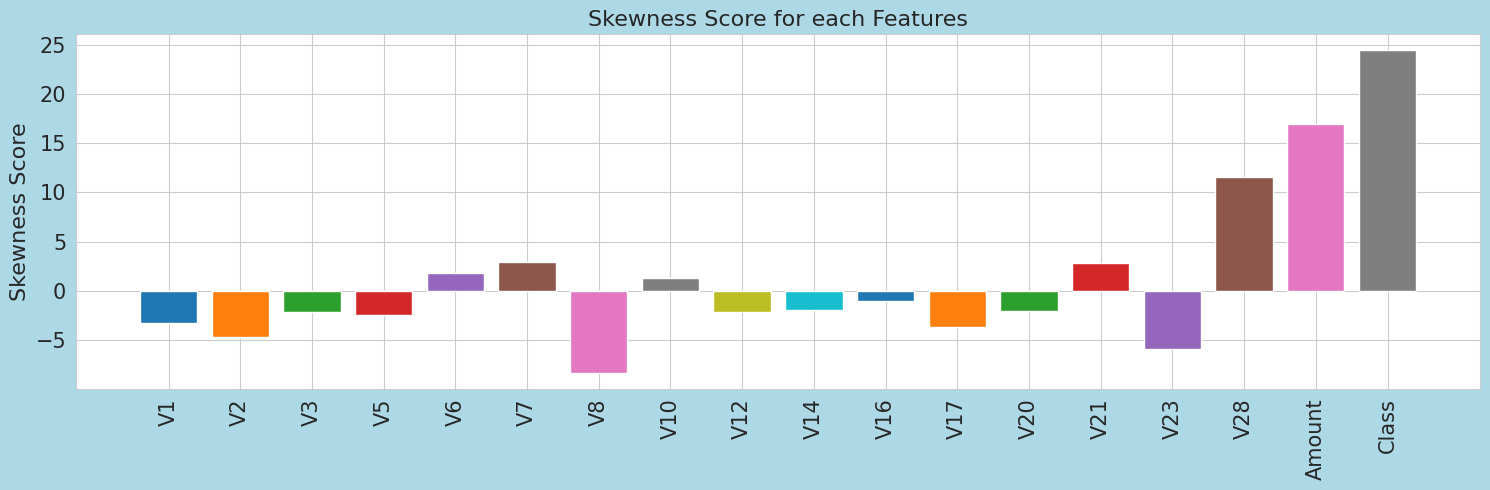

In [ ]:
# Visualization of skewness score
skew_score = {}
for column in features:
  skew_score[column] = df_new[column].skew(axis = 0)

# filtered features
filter_feature = [feature for feature, score in skew_score.items() if score < -1 or score > 1]

fig, ax = plt.subplots(figsize = (15,5))

for i, col in enumerate(filter_feature):
  ax.bar([i,i], [0, skew_score[col]] , label = col)

ax.set_xticks(range(len(filter_feature)))
ax.set_xticklabels(filter_feature, rotation = 90)
ax.set_title('Skewness Score for each Features', fontsize = 16)
ax.set_ylabel('Skewness Score', fontsize = 16)
# ax.legend(loc = 'upper right', bbox_to_anchor = (1.2,1)

# adjust the fontsize of x and y axis
ax.tick_params(axis = 'x', labelsize = 15)
ax.tick_params(axis = 'y', labelsize = 15)

fig.set_facecolor('#ADD8E6')
fig.tight_layout()
#plt.savefig('Skewness Score for each Features.png', dpi = 300)
#files.download('Skewness Score for each Features.png')
plt.show()

## Feature Selection

### Feature Selection By Using Imputation Dataset

In [ ]:
# Import decision tree model and random forest model
from sklearn.ensemble import RandomForestClassifier

rf_feat_sel_imp = RandomForestClassifier(max_depth=3, random_state=1)

X = imputation_data.drop(['Class','Time'], axis = 1)
y = imputation_data['Class']

rf_feat_sel_imp.fit(X,y)

rf_input1 = pd.DataFrame(rf_feat_sel_imp.feature_importances_, index = X.columns, columns = ['rf_importance']) # Random Forest + Imputation

rf_input1 = rf_input1.sort_values('rf_importance', ascending = False)


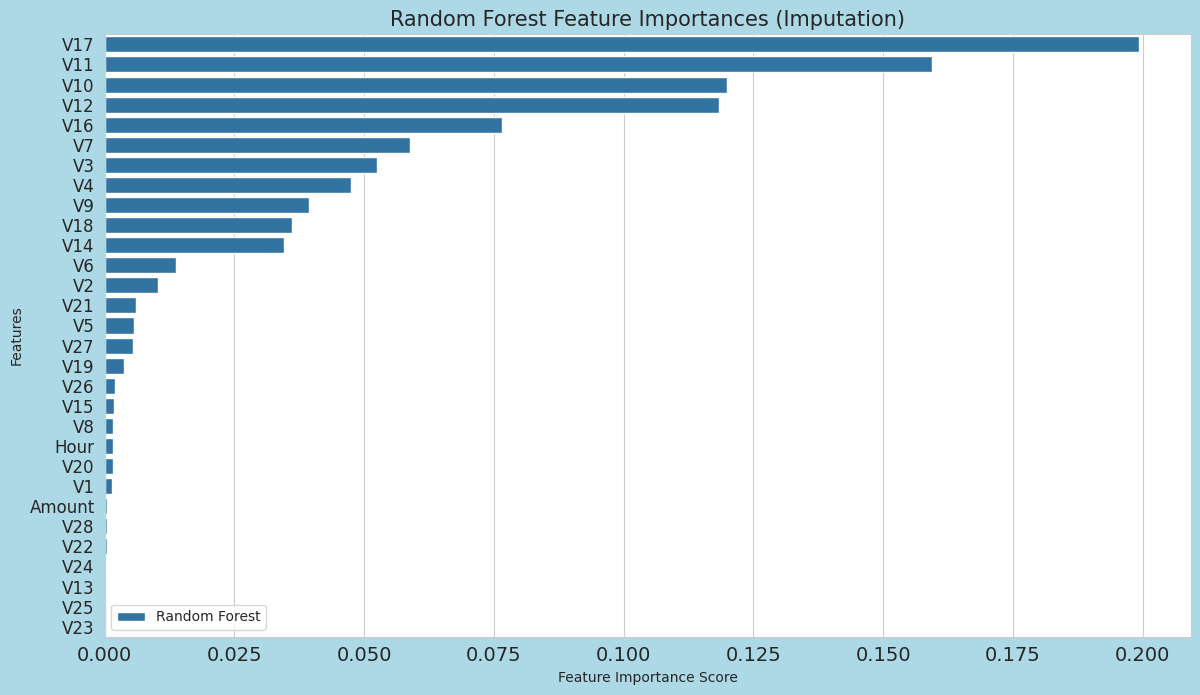

In [ ]:
# Decision Tree Feature Importances
fig = plt.figure(figsize = (12,7))

ax = sns.barplot(data = rf_input1, x = 'rf_importance', y = rf_input1.index, label = 'Random Forest') # dataset Decision Tree + Isolation Forest

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances (Imputation)', fontsize = 15)
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 12)
#plt.savefig('Random Forest Feature Importances (imputance).png', dpi = 300)
#iles.download('Random Forest Feature Importances (imputance).png')
plt.show()

In [ ]:
# Filter the importances score more than 0.1
important_cols = rf_input1[rf_input1.rf_importance > 0.050].index
df_imputance = imputation_data[important_cols] # As an input
df_imputance['Class'] = imputation_data['Class']
df_imputance

,V17,V11,V10,V12,V16,V7,V3,Class
0,0.207971,-0.551600,0.090794,-0.617801,-0.470401,0.239599,2.536347,0
1,-0.114805,1.612727,-0.166974,1.065235,0.463917,-0.078803,0.166480,0
2,1.109969,0.624501,0.207643,0.066084,-1.952416,0.791461,1.773209,0
3,-0.684093,-0.226487,-0.054952,0.178228,-1.059647,0.237609,1.792993,0
4,-0.237033,-0.822843,0.753074,0.538196,-0.451449,0.592941,1.548718,0
...,...,...,...,...,...,...,...,...
284802,1.723321,-1.593105,1.937414,2.151738,1.107641,-2.236984,-3.764645,0
284803,-0.025693,-0.150189,-0.975926,0.915802,-0.711757,0.024330,2.035030,0
284804,0.313502,0.411614,-0.484782,0.063119,0.140716,-0.296827,-3.249640,0
284805,0.509928,-1.933849,-0.399126,-0.962886,-0.608577,-0.686180,0.702510,0


### Feature Selection by Using Isolation Forest Data

In [ ]:
# Import decision tree model and random forest model
from sklearn.ensemble import RandomForestClassifier

rf_feat_sel_iso = RandomForestClassifier(max_depth=3, random_state=1)

X = isoforest_data.drop(['Class','Time'], axis = 1)
y = isoforest_data['Class']

rf_feat_sel_iso.fit(X,y)

rf_input2 = pd.DataFrame(rf_feat_sel_iso.feature_importances_, index = X.columns, columns = ['rf_importance']) # Random Forest + Imputation

rf_input2 = rf_input2.sort_values('rf_importance', ascending = False)


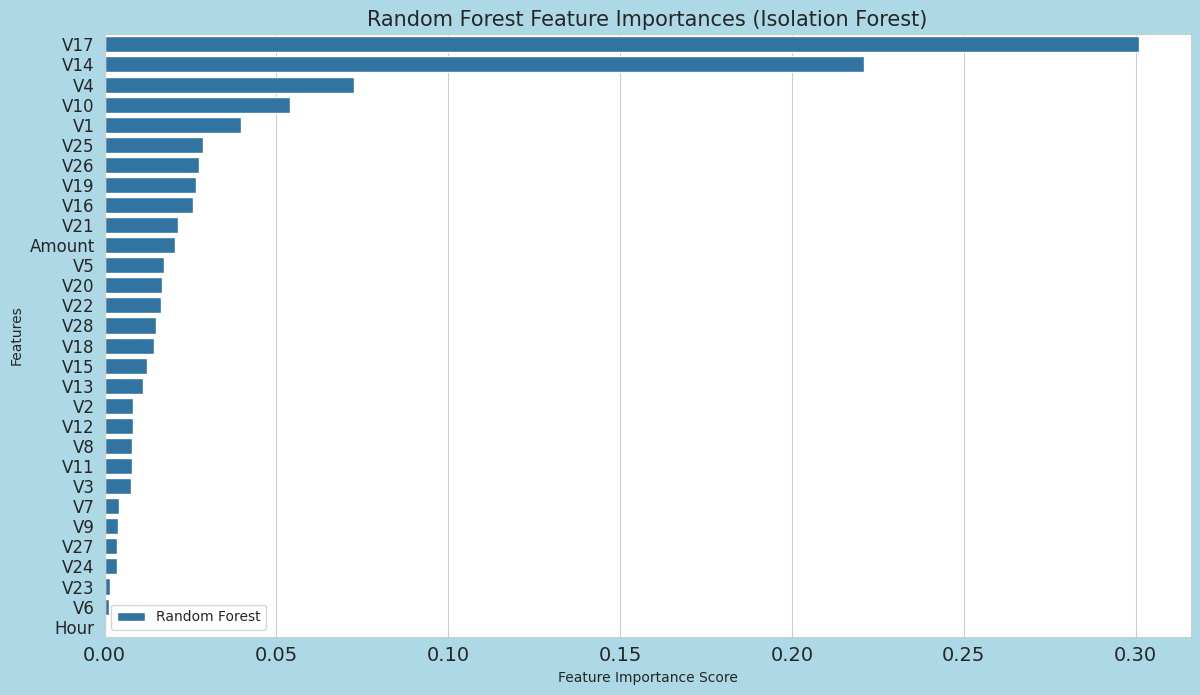

In [ ]:
# Random Forest Feature Importances with Isolation Forest Dataset
fig = plt.figure(figsize = (12,7))

ax = sns.barplot(data = rf_input2, x = 'rf_importance', y = rf_input2.index, label = 'Random Forest') # dataset Decision Tree + Isolation Forest

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances (Isolation Forest)', fontsize = 15)
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 12)
#plt.savefig('Decision Tree Feature Importances (Isolation Forest).png', dpi = 300)
#files.download('Decision Tree Feature Importances (Isolation Forest).png')
plt.show()

In [ ]:
# Filter the importances score more than 0.050
important_cols = rf_input2[rf_input2.rf_importance > 0.050].index
df_isoforest_data = isoforest_data[important_cols] # As an input
df_isoforest_data['Class'] = isoforest_data['Class']
df_isoforest_data

,V17,V14,V4,V10,Class
0,0.207971,-0.311169,1.378155,0.090794,0
1,-0.114805,-0.143772,0.448154,-0.166974,0
3,-0.684093,-0.287924,-0.863291,-0.054952,0
4,-0.237033,-1.119670,0.403034,0.753074,0
5,-0.058133,-0.137134,-0.168252,-0.371407,0
...,...,...,...,...,...
284801,0.070441,-0.731707,-0.745097,-0.657422,0
284803,-0.025693,-0.675143,-0.738589,-0.975926,0
284804,0.313502,-0.510602,-0.557828,-0.484782,0
284805,0.509928,0.449624,0.689799,-0.399126,0


### Feature Selection by Using Raw Data

In [ ]:
# Import decision tree model and random forest model
rf_feat_sel_raw = RandomForestClassifier(max_depth=3, random_state=1)

df_copy = df.copy()

X = df_copy.drop(['Class','Time'], axis = 1)
y = df_copy['Class']

rf_feat_sel_raw.fit(X,y)

rf_input3 = pd.DataFrame(rf_feat_sel_raw.feature_importances_, index = X.columns, columns = ['rf_importance']) # Random Forest + Imputation

rf_input3 = rf_input3.sort_values('rf_importance', ascending = False)


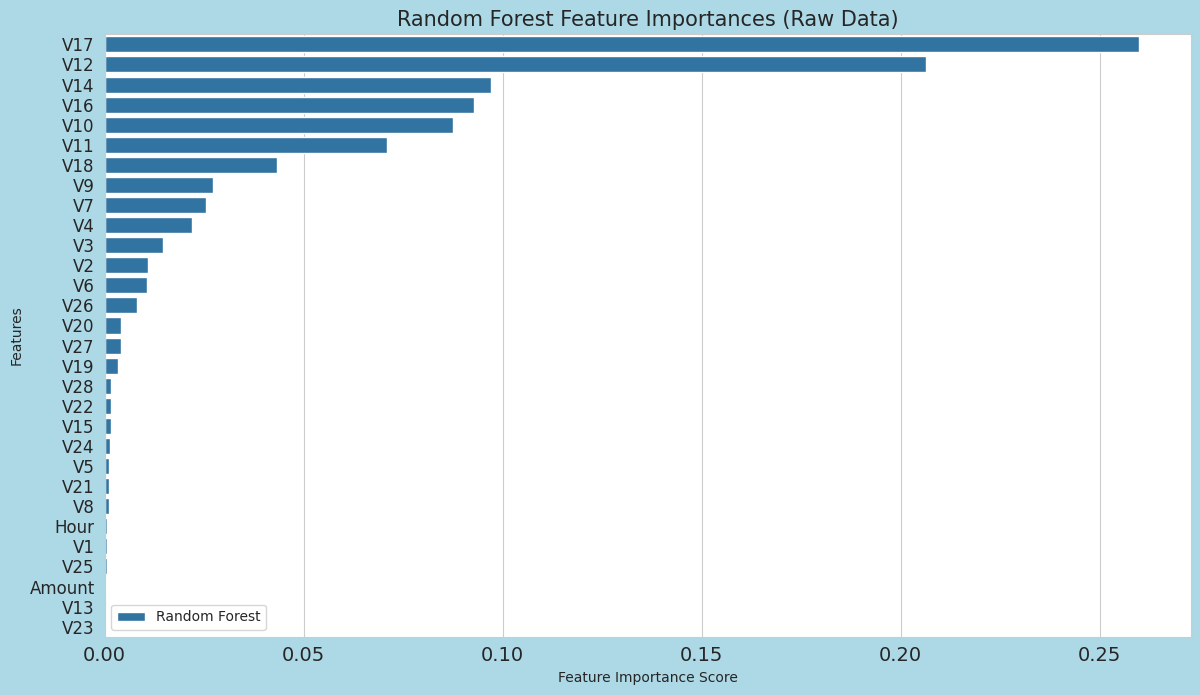

In [ ]:
# Random Forest Feature Importances with Isolation Forest Dataset
fig = plt.figure(figsize = (12,7))

ax = sns.barplot(data = rf_input3, x = 'rf_importance', y = rf_input3.index, label = 'Random Forest') # dataset Decision Tree + Isolation Forest

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances (Raw Data)', fontsize = 15)
fig.tight_layout()
fig.set_facecolor('#ADD8E6')
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 12)
#plt.savefig('Decision Tree Feature Importances (raw data).png', dpi = 300)
#files.download('Decision Tree Feature Importances (raw data).png')
plt.show()

In [ ]:
# Filter the importances score more than 0.050
important_cols = rf_input3[rf_input3.rf_importance > 0.050].index
df_raw_data = df_copy[important_cols] # As an input
df_raw_data['Class'] = df_copy['Class']
df_raw_data

,V17,V12,V14,V16,V10,V11,Class
0,0.207971,-0.617801,-0.311169,-0.470401,0.090794,-0.551600,0
1,-0.114805,1.065235,-0.143772,0.463917,-0.166974,1.612727,0
2,1.109969,0.066084,-0.165946,-2.890083,0.207643,0.624501,0
3,-0.684093,0.178228,-0.287924,-1.059647,-0.054952,-0.226487,0
4,-0.237033,0.538196,-1.119670,-0.451449,0.753074,-0.822843,0
...,...,...,...,...,...,...,...
284802,1.991691,2.711941,4.626942,1.107641,4.356170,-1.593105,0
284803,-0.025693,0.915802,-0.675143,-0.711757,-0.975926,-0.150189,0
284804,0.313502,0.063119,-0.510602,0.140716,-0.484782,0.411614,0
284805,0.509928,-0.962886,0.449624,-0.608577,-0.399126,-1.933849,0


### Additional Note: Use XGBoost to predict feature Importances

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

X = df_copy.drop(['Class','Time'], axis = 1)
y = df_copy['Class']

xgb_model.fit(X,y)

xgb_input = pd.DataFrame(xgb_model.feature_importances_, index = X.columns, columns = ['xgb_importance']) # Random Forest + Imputation

xgb_input = xgb_input.sort_values('xgb_importance', ascending = False)

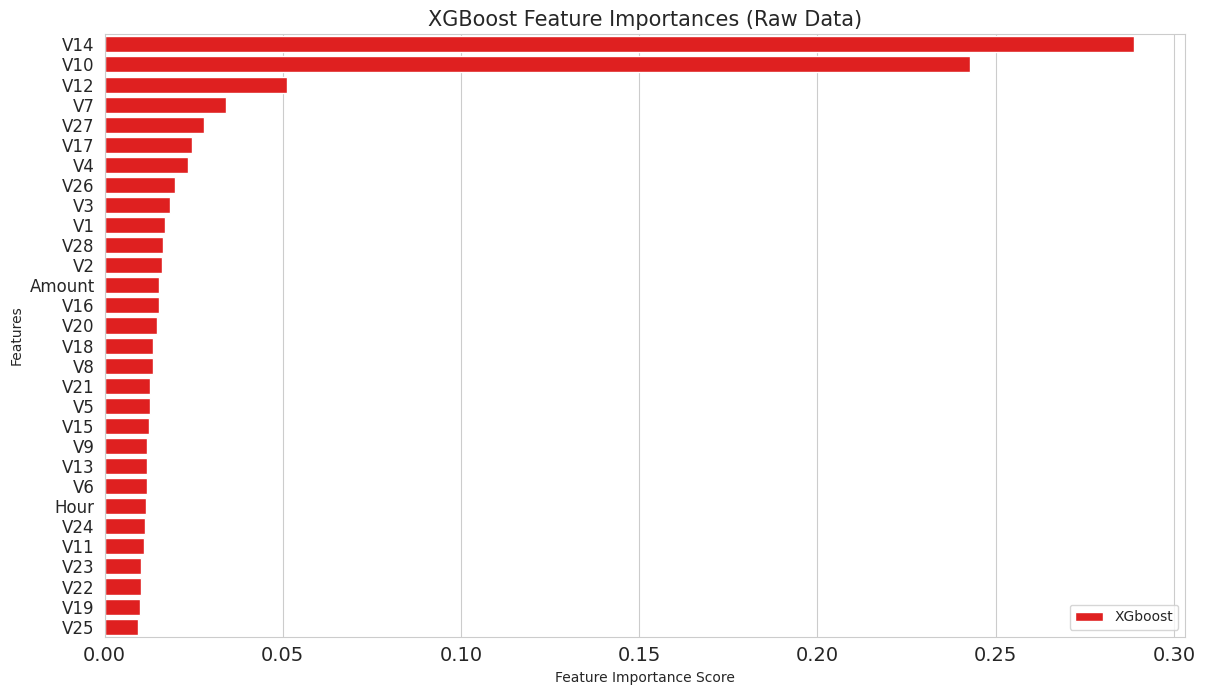

In [ ]:
# Random Forest Feature Importances with Isolation Forest Dataset
fig = plt.figure(figsize = (12,7))

ax = sns.barplot(data = xgb_input, x = 'xgb_importance', y = xgb_input.index, label = 'XGboost', color = 'red') # dataset Decision Tree + Isolation Forest

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('XGBoost Feature Importances (Raw Data)', fontsize = 15)
fig.tight_layout()
ax.tick_params(axis = 'x', labelsize = 14)
ax.tick_params(axis = 'y', labelsize = 12)
#plt.savefig('Extra Gradient Boost Feature Importances (raw data).png')
#files.download('Extra Gradient Boost Feature Importances (raw data).png')
plt.show()

# Experiment Part

---

## Dataset without Oversampling

### Utilize Imputation Filtered Data

In [ ]:
# use imputation data
from sklearn.model_selection import train_test_split

X_imputance = df_imputance.drop(['Class'], axis = 1)
y_imputance = df_imputance['Class']

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imputance, y_imputance, test_size = 0.2, random_state = 43)

rf_model = RandomForestClassifier(max_depth=3, random_state=1)

rf_model.fit(X_train_imp, y_train_imp)

# Credit Card Detection

from sklearn.metrics import classification_report, confusion_matrix

y_pred_imputance = rf_model.predict(X_test_imp)

print('Classificaton Report by Using Imputation Data')
print(classification_report(y_test_imp, y_pred_imputance))

Classificaton Report by Using Imputation Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56644
           1       0.85      0.69      0.76       102

    accuracy                           1.00     56746
   macro avg       0.93      0.84      0.88     56746
weighted avg       1.00      1.00      1.00     56746



### Utilize Isolation Forest Filtered Data

In [ ]:
# use isolation forest data
from sklearn.model_selection import train_test_split

X_iso = df_isoforest_data.drop(['Class'], axis = 1)
y_iso = df_isoforest_data['Class']

X_train_iso, X_test_iso, y_train_iso, y_test_iso = train_test_split(X_iso, y_iso, test_size = 0.2, random_state = 43)

rf_model = RandomForestClassifier(max_depth=3, random_state=1)

rf_model.fit(X_train_iso, y_train_iso)

# Credit Card Detection

from sklearn.metrics import classification_report, confusion_matrix

y_pred_isoforest = rf_model.predict(X_test_iso)

print('Classificaton Report by Using Isolation Forest')
print(classification_report(y_test_iso, y_pred_isoforest))

Classificaton Report by Using Isolation Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51063
           1       0.00      0.00      0.00         8

    accuracy                           1.00     51071
   macro avg       0.50      0.50      0.50     51071
weighted avg       1.00      1.00      1.00     51071



###  Utilize Raw Data to Create Fraud Detection

In [ ]:
# use raw data
from sklearn.model_selection import train_test_split

X_raw = df_raw_data.drop(['Class'], axis = 1)
y_raw = df_raw_data['Class']

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size = 0.2, random_state = 43)

rf_model = RandomForestClassifier(max_depth=3, random_state=1)

rf_model.fit(X_train_raw, y_train_raw)

# Credit Card Detection of raw data

from sklearn.metrics import classification_report, confusion_matrix

y_pred_rawdata = rf_model.predict(X_test_raw)

print('Classificaton Report by Using Raw Data')
print(classification_report(y_test_raw, y_pred_rawdata))

Classificaton Report by Using Raw Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56856
           1       0.83      0.67      0.74       106

    accuracy                           1.00     56962
   macro avg       0.91      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962



### Comparison Between Filtered Data by Using Confusion Matrix

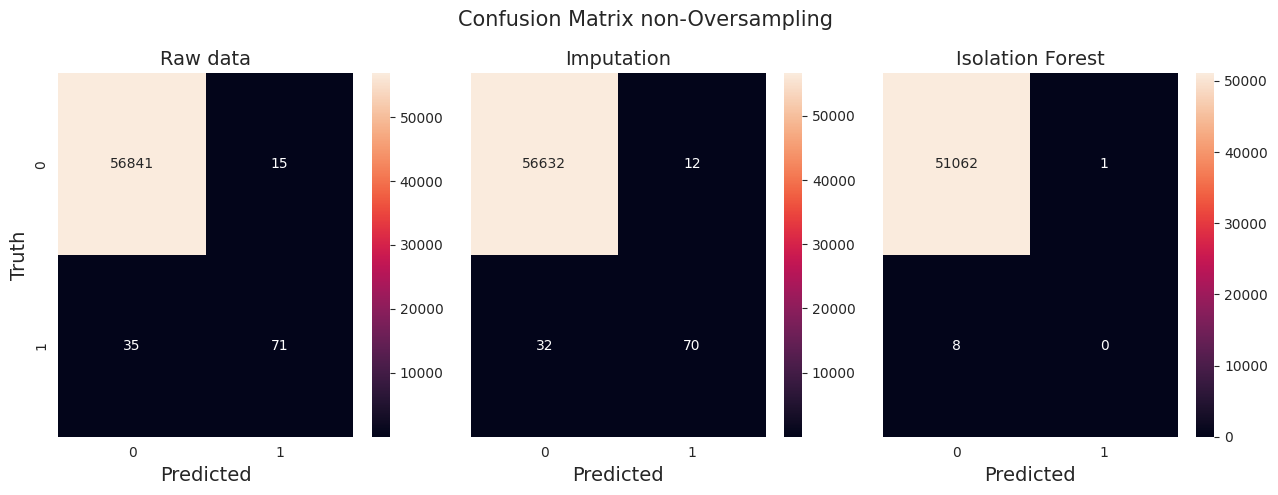

In [ ]:
# Decision Tree Heatmap
fig, axs = plt.subplots(ncols=3, nrows=1 , figsize = (13,5), sharex = True, sharey = True)
sns.heatmap(confusion_matrix(y_test_raw, y_pred_rawdata), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test_imp, y_pred_imputance), annot = True, fmt = 'd', ax = axs[1])
sns.heatmap(confusion_matrix(y_test_iso, y_pred_isoforest), annot = True, fmt = 'd', ax = axs[2])
axs[0].set_title('Raw data', fontsize = 14)
axs[0].set_xlabel('Predicted', fontsize = 14)
axs[0].set_ylabel('Truth', fontsize = 14)
axs[1].set_title('Imputation', fontsize = 14)
axs[1].set_xlabel('Predicted', fontsize = 14)
axs[2].set_title('Isolation Forest', fontsize = 14)
axs[2].set_xlabel('Predicted', fontsize = 14)
fig.suptitle('Confusion Matrix non-Oversampling', fontsize = 15)
fig.tight_layout()
#plt.savefig('rf dt conf mat no oversampling.png', dpi = 300)
#files.download('rf dt conf mat no oversampling.png')
plt.show()

## Create an Oversampled Dataset


### Oversampling Raw Data

In [ ]:
# import undesampling and oversampling
from imblearn.over_sampling import SMOTE

oversampling = SMOTE()

# Train dataset oversampling of raw data
X_train_raw_over, y_train_raw_over = oversampling.fit_resample(X_train_raw, y_train_raw)

# Test dataset oversampling of raw data
X_test_raw_over, y_test_raw_over = oversampling.fit_resample(X_test_raw, y_test_raw)




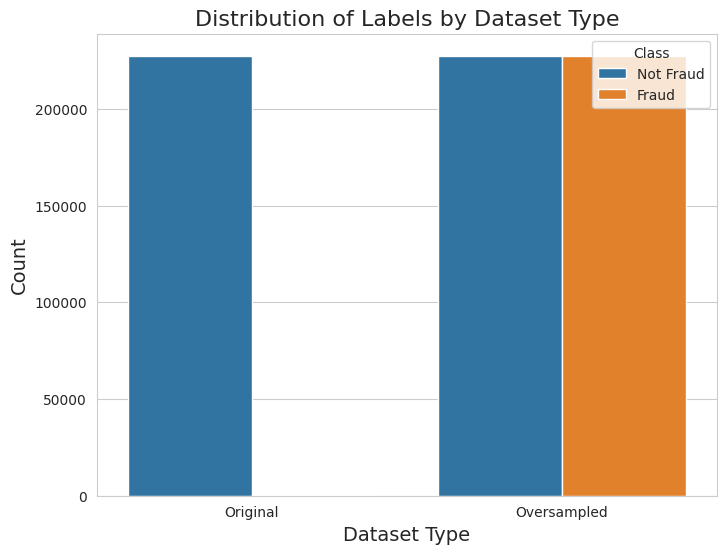

In [ ]:
# create new dataset and its plot
original = pd.DataFrame({'label': y_train_raw, 'Type': 'Original'})
original_2 = pd.DataFrame({'label': y_test_raw, 'Type': 'Original'})
oversampled = pd.DataFrame({'label': y_train_raw_over, 'Type': 'Oversampled'})
combined_label = pd.concat([original, oversampled])

# Stacked barplot with combined_label dataset
# Assuming combined_label DataFrame exists from the previous code

fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(data=combined_label, x='Type', hue='label', ax=ax)

ax.set_title('Distribution of Labels by Dataset Type', fontsize=16)
ax.set_xlabel('Dataset Type', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticklabels(['Original', 'Oversampled'])
ax.legend(title='Class', labels=['Not Fraud', 'Fraud'])

#plt.savefig('Stacked Barplot.png', dpi = 400)
#files.download('Stacked Barplot.png')

plt.show()

### Oversampling Imputation Data

In [ ]:
# Train Dataset oversampling of imputation data
X_train_imp_over, y_train_imp_over = oversampling.fit_resample(X_train_imp, y_train_imp)

# Test dataset oversampling of imputation data
X_test_imp_over, y_test_imp_over = oversampling.fit_resample(X_test_imp, y_test_imp)

### Oversampling Isolation Forest Data

In [ ]:
# Train Dataset oversampling of isolation forest data
X_train_iso_over, y_train_iso_over = oversampling.fit_resample(X_train_iso, y_train_iso)

# Test dataset oversampling of isolation forest data
X_test_iso_over, y_test_iso_over = oversampling.fit_resample(X_test_iso, y_test_iso)

## Credit Card Detection

### Credit card detection with the Oversampled Raw Data (Save it with Pickle)

In [ ]:
# Train the data

rf_raw = RandomForestClassifier(max_depth=3, random_state=1)

rf_raw.fit(X_train_raw_over, y_train_raw_over)

# Credit Card Detection

from sklearn.metrics import classification_report, confusion_matrix

#y_pred_rawdata_over = rf_raw.predict(X_test_raw)
y_pred_rawdata_over = rf_raw.predict(X_test_raw_over) # Modified to predict on the oversampled test data

print('Classificaton Report by Using Raw Data with Oversampling')
print(classification_report(y_test_raw_over, y_pred_rawdata_over))

Classificaton Report by Using Raw Data with Oversampling
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     56856
           1       0.98      0.86      0.92     56856

    accuracy                           0.92    113712
   macro avg       0.93      0.92      0.92    113712
weighted avg       0.93      0.92      0.92    113712



In [ ]:
# save the model
import pickle

filename = 'rf_raw_data_model.pkl'
pickle.dump(rf_raw, open(filename, 'wb'))

# to load the model
# load_mod = pickle.load(open(filename, 'rb'))

### Credit Card Detection with Oversampled Isolation Forest Dataset

In [ ]:
# Train the model

rf_iso = RandomForestClassifier(max_depth=3, random_state=1)

rf_iso.fit(X_train_iso_over, y_train_iso_over)

# Credit Card Fraud Detection

y_pred_isodata_over = rf_iso.predict(X_test_iso_over)

print('Classificaton Report by Using Isolation Forest Data')
print(classification_report(y_test_iso_over, y_pred_isodata_over))

Classificaton Report by Using Imputation Data
              precision    recall  f1-score   support

           0       0.59      0.87      0.70     51063
           1       0.75      0.41      0.53     51063

    accuracy                           0.64    102126
   macro avg       0.67      0.64      0.62    102126
weighted avg       0.67      0.64      0.62    102126



In [ ]:
# Save the model

filename = 'rf_isodata_model.pkl'
pickle.dump(rf_iso, open(filename, 'wb'))

# load the model
# load_mod = pickle.load(open(filename, 'wb'))

### Credit Card Detection with Oversampled Imputation Data

In [ ]:
# Train the model

rf_imp = RandomForestClassifier(max_depth=3, random_state=1)
rf_imp.fit(X_train_imp_over, y_train_imp_over)

# Credit Card Fraud Detection

y_pred_imputance_over = rf_imp.predict(X_test_imp_over)

print('Classificaton Report by Using Imputation Data')
print(classification_report(y_test_imp_over, y_pred_imputance_over))

Classificaton Report by Using Imputation Data
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     56644
           1       1.00      0.86      0.92     56644

    accuracy                           0.93    113288
   macro avg       0.94      0.93      0.93    113288
weighted avg       0.94      0.93      0.93    113288



In [ ]:
# Save the model

filename = 'rf_imputance_model.pkl'
pickle.dump(rf_imp, open(filename, 'wb'))

# load the model
# load_mod = pickle.load(open(filename, 'wb'))

### Comparison Model with Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

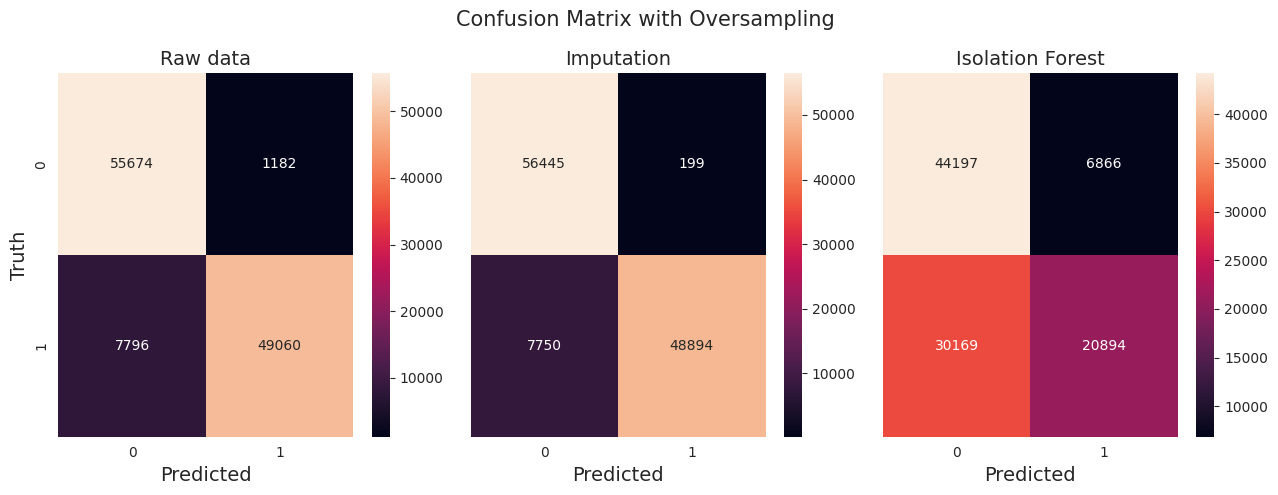

In [ ]:
# Decision Tree Heatmap
fig, axs = plt.subplots(ncols=3, nrows=1 , figsize = (13,5), sharex = True, sharey = True)
sns.heatmap(confusion_matrix(y_test_raw_over, y_pred_rawdata_over), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test_imp_over, y_pred_imputance_over), annot = True, fmt = 'd', ax = axs[1])
sns.heatmap(confusion_matrix(y_test_iso_over, y_pred_isodata_over), annot = True, fmt = 'd', ax = axs[2])
axs[0].set_title('Raw data', fontsize = 14)
axs[0].set_xlabel('Predicted', fontsize = 14)
axs[0].set_ylabel('Truth', fontsize = 14)
axs[1].set_title('Imputation', fontsize = 14)
axs[1].set_xlabel('Predicted', fontsize = 14)
axs[2].set_title('Isolation Forest', fontsize = 14)
axs[2].set_xlabel('Predicted', fontsize = 14)
fig.suptitle('Confusion Matrix with Oversampling', fontsize = 15)
fig.tight_layout()
plt.savefig('rf dt conf mat oversampling.png', dpi = 300)
files.download('rf dt conf mat oversampling.png')
plt.show()

### Comparison model with ROC Curve

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

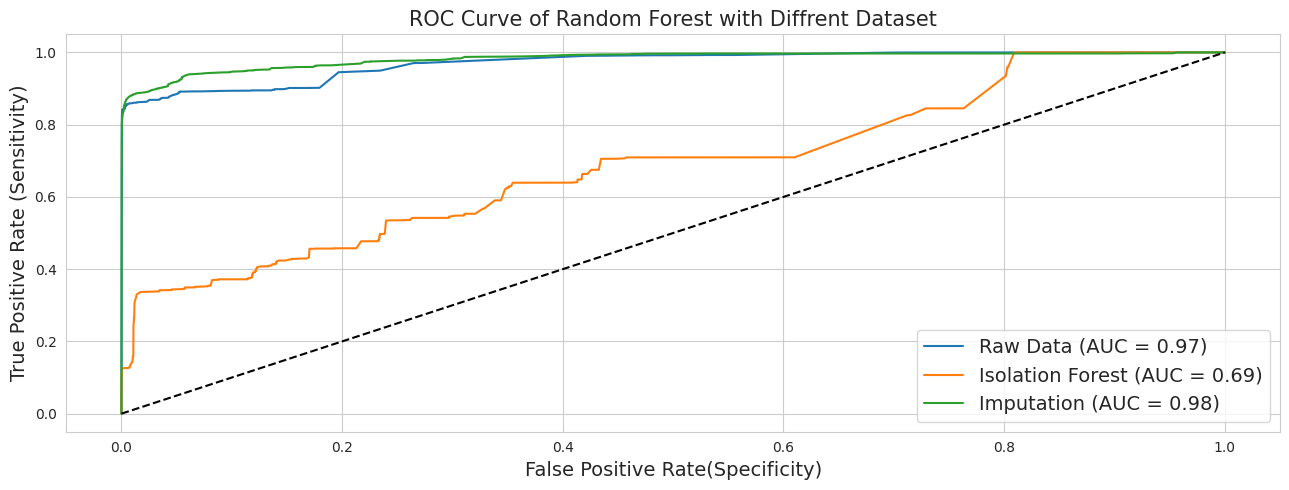

In [ ]:
# Make roc curve of each model
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probability of oversampled dataset
y_pred_rawdata_over_prob = rf_raw.predict_proba(X_test_raw_over)[:,1]
y_pred_isodata_over_prob = rf_iso.predict_proba(X_test_iso_over)[:,1]
y_pred_imputance_over_prob = rf_imp.predict_proba(X_test_imp_over)[:,1]

# Find false positive rate (specificity) and true positive rate (sensitivity)
fpr_raw, tpr_raw, _ = roc_curve(y_test_raw_over, y_pred_rawdata_over_prob)
fpr_iso, tpr_iso, _ = roc_curve(y_test_iso_over, y_pred_isodata_over_prob)
fpr_imputance, tpr_imputance, _ = roc_curve(y_test_imp_over, y_pred_imputance_over_prob)

auc_iso_over = roc_auc_score(y_test_iso_over, y_pred_isodata_over_prob)
auc_raw_over = roc_auc_score(y_test_raw_over, y_pred_rawdata_over_prob)
auc_imputance_over = roc_auc_score(y_test_imp_over, y_pred_imputance_over_prob)

# Plot ROC curve
fig = plt.figure(figsize = (13,5))

sns.lineplot(x = fpr_raw, y = tpr_raw, label = 'Raw Data (AUC = %0.2f)' % auc_raw_over)
sns.lineplot(x = fpr_iso, y = tpr_iso, label = 'Isolation Forest (AUC = %0.2f)' % auc_iso_over)
sns.lineplot(x = fpr_imputance, y = tpr_imputance, label = 'Imputation (AUC = %0.2f)' % auc_imputance_over)
sns.lineplot(x = [0,1], y = [0,1], color = 'black', linestyle = '--')

plt.xlabel('False Positive Rate(Specificity)', fontsize = 14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 14)
plt.title("ROC Curve of Random Forest with Diffrent Dataset", fontsize = 15)
plt.legend(loc = 'lower right', fontsize = 14)
fig.tight_layout()
plt.savefig('ROC Curve different dataset.png', dpi = 300)
files.download('ROC Curve different dataset.png')
plt.show()

## Credit Card Detection By Grid Search CV

### Credit Card detection using Raw Data

In [ ]:
# Create random forest model enchanced by stratified k-fold
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
rf_param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'min_samples_split':[2,4],
    'min_samples_leaf':[1,2]
}

### Raw Data with GridSearch CV

In [ ]:
# Create Model
rf_raw = RandomForestClassifier(random_state = 1)

# Make GridSearchCV model
rf_gridsearch_raw = GridSearchCV(estimator = rf_raw, param_grid = rf_param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the model
rf_gridsearch_raw.fit(X_train_raw_over, y_train_raw_over)

# Best parameter
print('Random Forest Raw Data best Params: ')
print(rf_gridsearch_raw.best_params_)
print('-----------------')
print('Random Forest Raw Data best estimator: ')
print(rf_gridsearch_raw.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Random Forest Raw Data best Params: 
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
-----------------
Random Forest Raw Data best estimator: 
RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)


In [ ]:
# Get the best parameter model

best_rf_raw_over = rf_gridsearch_raw.best_estimator_

In [ ]:
# Train the best model

y_pred_best_raw_over = best_rf_raw_over.predict(X_test_raw_over)

print('Classificaton Report by Using Imputation Data')
print(classification_report(y_test_raw_over, y_pred_best_raw_over))

Classificaton Report by Using Imputation Data
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     56856
           1       0.98      0.87      0.92     56856

    accuracy                           0.92    113712
   macro avg       0.93      0.92      0.92    113712
weighted avg       0.93      0.92      0.92    113712



### Isolation Forest Data with GridSearch CV

In [ ]:
# Create Model
rf_iso = RandomForestClassifier(random_state = 1)

# Make GridSearchCV model
rf_gridsearch_iso = GridSearchCV(estimator = rf_iso, param_grid = rf_param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the model
rf_gridsearch_iso.fit(X_train_iso_over, y_train_iso_over)

# Best parameter
print('Random Forest Isolation Forest Data best Params: ')
print(rf_gridsearch_iso.best_params_)
print('-----------------')
print('Random Forest Isolation Forest Data best estimator: ')
print(rf_gridsearch_iso.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Random Forest Isolation Forest Data best Params: 
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
-----------------
Random Forest Isolation Forest Data best estimator: 
RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)


In [ ]:
# Get the best parameter

best_rf_iso_over = rf_gridsearch_iso.best_estimator_

In [ ]:
# Train the best model

y_pred_best_iso_over = best_rf_iso_over.predict(X_test_iso_over)

print('Classificaton Report by Using Imputation Data')
print(classification_report(y_test_iso_over, y_pred_best_iso_over))

Classificaton Report by Using Imputation Data
              precision    recall  f1-score   support

           0       0.60      0.91      0.72     51063
           1       0.81      0.38      0.52     51063

    accuracy                           0.65    102126
   macro avg       0.70      0.65      0.62    102126
weighted avg       0.70      0.65      0.62    102126



### Imputation Data with GridSearchCV

In [ ]:
# Create Model
rf_imp = RandomForestClassifier(random_state = 1)

# Make GridSearchCV model
rf_gridsearch_imp = GridSearchCV(estimator = rf_imp, param_grid = rf_param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the model
rf_gridsearch_imp.fit(X_train_imp_over, y_train_imp_over)

# Best parameter
print('Random Forest Imputation Data best Params: ')
print(rf_gridsearch_imp.best_params_)
print('-----------------')
print('Random Forest Imputation Data best estimator: ')
print(rf_gridsearch_imp.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Random Forest Isolation Forest Data best Params: 
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
-----------------
Random Forest Isolation Forest Data best estimator: 
RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=50,
                       random_state=1)


In [ ]:
# Get the Best Parameter

best_rf_imp_over = rf_gridsearch_imp.best_estimator_

In [ ]:
# predict the best model

y_pred_best_imp_over = best_rf_imp_over.predict(X_test_imp_over)

print('Classificaton Report by Using Imputation Data')
print(classification_report(y_test_imp_over, y_pred_best_imp_over))

Classificaton Report by Using Imputation Data
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     56644
           1       0.98      0.88      0.93     56644

    accuracy                           0.93    113288
   macro avg       0.94      0.93      0.93    113288
weighted avg       0.94      0.93      0.93    113288



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

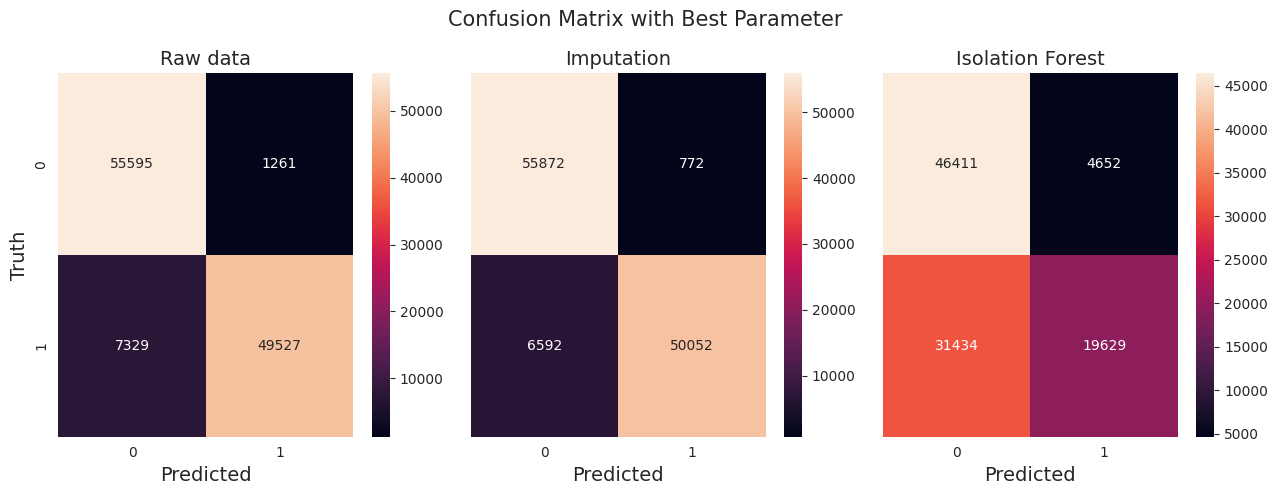

In [ ]:
# Decision Tree Heatmap
fig, axs = plt.subplots(ncols=3, nrows=1 , figsize = (13,5), sharex = True, sharey = True)
sns.heatmap(confusion_matrix(y_test_raw_over, y_pred_best_raw_over), annot = True, fmt = 'd', ax = axs[0])
sns.heatmap(confusion_matrix(y_test_imp_over, y_pred_best_imp_over), annot = True, fmt = 'd', ax = axs[1])
sns.heatmap(confusion_matrix(y_test_iso_over, y_pred_best_iso_over), annot = True, fmt = 'd', ax = axs[2])
axs[0].set_title('Raw data', fontsize = 14)
axs[0].set_xlabel('Predicted', fontsize = 14)
axs[0].set_ylabel('Truth', fontsize = 14)
axs[1].set_title('Imputation', fontsize = 14)
axs[1].set_xlabel('Predicted', fontsize = 14)
axs[2].set_title('Isolation Forest', fontsize = 14)
axs[2].set_xlabel('Predicted', fontsize = 14)
fig.suptitle('Confusion Matrix with Best Parameter', fontsize = 15)
fig.tight_layout()
#plt.savefig('rf dt conf mat best parameter.png', dpi = 300)
#files.download('rf dt conf mat best parameter.png')
plt.show()

## Comparison the best parameter model with ROC Curve

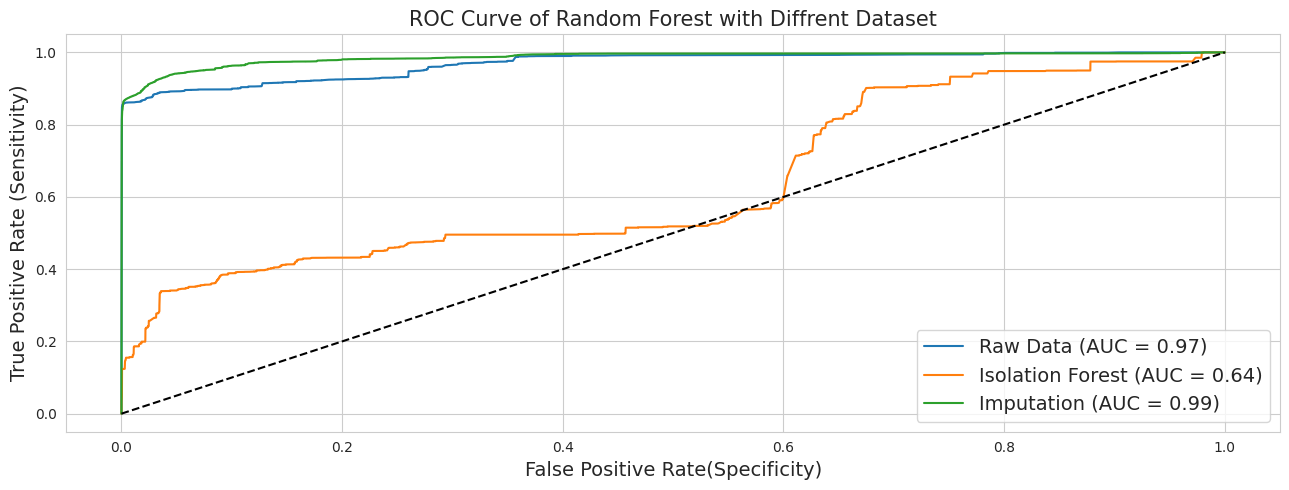

In [ ]:
# Make roc curve of each model
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probability of oversampled dataset
y_pred_rawdata_best_prob = best_rf_raw_over.predict_proba(X_test_raw_over)[:,1]
y_pred_isodata_best_prob = best_rf_iso_over.predict_proba(X_test_iso_over)[:,1]
y_pred_imputance_best_prob = best_rf_imp_over.predict_proba(X_test_imp_over)[:,1]

# Find false positive rate (specificity) and true positive rate (sensitivity)
fpr_raw, tpr_raw, _ = roc_curve(y_test_raw_over, y_pred_rawdata_best_prob)
fpr_iso, tpr_iso, _ = roc_curve(y_test_iso_over, y_pred_isodata_best_prob)
fpr_imputance, tpr_imputance, _ = roc_curve(y_test_imp_over, y_pred_imputance_best_prob)

auc_iso_over = roc_auc_score(y_test_iso_over, y_pred_isodata_best_prob)
auc_raw_over = roc_auc_score(y_test_raw_over, y_pred_rawdata_best_prob)
auc_imputance_over = roc_auc_score(y_test_imp_over, y_pred_imputance_best_prob)

# Plot ROC curve
fig = plt.figure(figsize = (13,5))

sns.lineplot(x = fpr_raw, y = tpr_raw, label = 'Raw Data (AUC = %0.2f)' % auc_raw_over)
sns.lineplot(x = fpr_iso, y = tpr_iso, label = 'Isolation Forest (AUC = %0.2f)' % auc_iso_over)
sns.lineplot(x = fpr_imputance, y = tpr_imputance, label = 'Imputation (AUC = %0.2f)' % auc_imputance_over)
sns.lineplot(x = [0,1], y = [0,1], color = 'black', linestyle = '--')

plt.xlabel('False Positive Rate(Specificity)', fontsize = 14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 14)
plt.title("ROC Curve of Random Forest with Diffrent Dataset", fontsize = 15)
plt.legend(loc = 'lower right', fontsize = 14)
fig.tight_layout()
#plt.savefig('ROC Curve best parameter.png', dpi = 300)
#files.download('ROC Curve best parameter.png')
plt.show()

In [ ]:
# Library Version
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import sklearn
import imblearn
import xgboost as xgb

print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Imbalanced-learn version: {imblearn.__version__}")
print(f"XGBoost version: {xgb.__version__}")

Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2
Numpy version: 2.0.2
Scikit-learn version: 1.6.1
Imbalanced-learn version: 0.13.0
XGBoost version: 2.1.4
